In [1]:
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from utils.utils import eval_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
target = 'target'
data = df

In [60]:
model_ctgan = CTGANSynthesizer(epochs=5)
model_ctgan.fit(data)

## Privacy

## Fidelity

In [61]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

def eval_fidelity(X_train, y_train, X_test, X_syn_train, X_syn_test, y_syn_train):
    learners = [(AdaBoostClassifier(n_estimators=50))]

    history = dict()

    for i in range(len(learners)):
        model_real = learners[i]
        model_real.fit(X_train, y_train)

        model_fake = learners[i]
        model_fake.fit(X_syn_train, y_syn_train)

        #first letter is data where it trained, second is data where it tested
        rr_pred = []
        fr_pred = []
        ff_pred = []
        rf_pred = []

        for j in range (len(X_test)):
            #print(X_test.loc[[j]])
            rr_pred.append(model_real.predict(X_test.iloc[[j]]))
            fr_pred.append(model_fake.predict(X_test.iloc[[j]]))
            rf_pred.append(model_real.predict(X_syn_test.iloc[[j]]))
            ff_pred.append(model_fake.predict(X_syn_test.iloc[[j]]))
        
    return rr_pred, fr_pred, rf_pred, ff_pred

In [62]:
# evaluate performance using real data
X = data.drop([target], axis=1)
y = data[target]



samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)
X_syn = samples.drop([target], axis=1)
y_syn = samples[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred, fr_pred, rf_pred, ff_pred = eval_fidelity(X_train, y_train, X_test, X_syn_train, X_syn_test, y_syn_train)

<class 'pandas.core.frame.DataFrame'>


In [83]:
print(ff_pred[10:20])
print(rf_pred[10:20])

[array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1])]
[array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1])]


In [65]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred, rf_pred, ff_pred):
    confusion_matrix1 = metrics.confusion_matrix(rr_pred, rf_pred)
    confusion_matrix2 = metrics.confusion_matrix(fr_pred, ff_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
    cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

    cm_display1.plot()
    cm_display2.plot()
    plt.show()




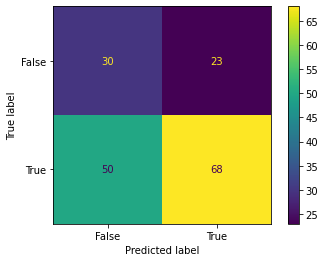

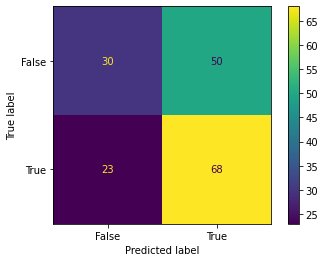

In [66]:

print_confusion_matrix(rr_pred, fr_pred, rf_pred, ff_pred)

In [84]:
dpctgan = DPCTGANSynthesizer(verbose=True,
                            epochs=2,
                            clip_coeff=0.1,
                            sigma=4,
                            target_epsilon=4,
                            target_delta=1e-5
                            )
dpctgan.fit(data)

Init CTGAN with differential privacy.  Target epsilon: 4
Epoch 1, Loss G: -0.0103, Loss D:  0.0315, Epsilon: 1.1379
Epoch 2, Loss G: -0.0182, Loss D: -0.0327, Epsilon: 1.6057
Epoch 3, Loss G:  0.0154, Loss D: -0.0061, Epsilon: 1.9682
Epoch 4, Loss G:  0.0120, Loss D: -0.1163, Epsilon: 2.2780
Epoch 5, Loss G: -0.0023, Loss D: -0.1842, Epsilon: 2.5529
Epoch 6, Loss G:  0.0656, Loss D: -0.2505, Epsilon: 2.8073
Epoch 7, Loss G:  0.0437, Loss D: -0.3179, Epsilon: 3.0354
Epoch 8, Loss G:  0.0525, Loss D: -0.3978, Epsilon: 3.2574
Epoch 9, Loss G: -0.0275, Loss D: -0.5077, Epsilon: 3.4590
Epoch 10, Loss G: -0.0300, Loss D: -0.5351, Epsilon: 3.6605
Epoch 11, Loss G: -0.0485, Loss D: -0.5780, Epsilon: 3.8481
Epoch 12, Loss G: -0.2090, Loss D: -0.7223, Epsilon: 4.0235


In [ ]:
# DPCTGAN
samples = dpctgan.sample(len(data))  # Synthetic copy
X_syn = samples.drop([target], axis=1)
y_syn = samples[target]

In [111]:
from math import dist

def get_nearest(src_point, candidates):
    min_dist = 1000
    min_index = 0
    for i in range(len(candidates)):
        distance = dist(src_point, candidates.iloc[[i]])
        if distance < min_dist:
            min_dist = dist
            min_index = i

    return min_index, min_dist


## Privacy

In [112]:
# from utils.privacy import get_nearest
# from utils.privacy import avg_dist
closest, dist = get_nearest(X_syn.iloc[[0]], X)

TypeError: must be real number, not str

## Fidelity

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred, fr_pred, rf_pred, ff_pred = eval_fidelity(X_train, y_train, X_test, X_syn_train, X_syn_test, y_syn_train)

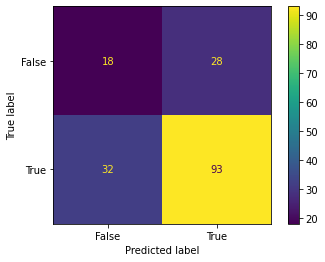

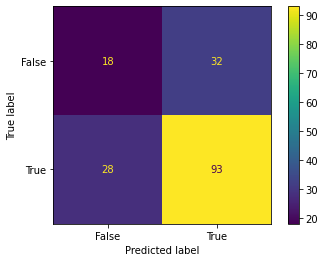

In [86]:
print_confusion_matrix(rr_pred, fr_pred, rf_pred, ff_pred)